# making html pages to view coadds and cutouts


## TO DO

* look for images - if they exist, you don't have to remake them
* figure out how to incorporate the photzp image surfaces - they are stored with raw data
* start building one page per cutout

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.chdir('/home/rfinn/research/Virgo/html-dev/')

Found /home/rfinn/research/Virgo/html-dev/coadds/VF-219.9485+5.3942-INT-20190530-p019/r-coadd.png.  not remaking this.
Found /home/rfinn/research/Virgo/html-dev/coadds/VF-219.9485+5.3942-INT-20190530-p019/ha-coadd.png.  not remaking this.


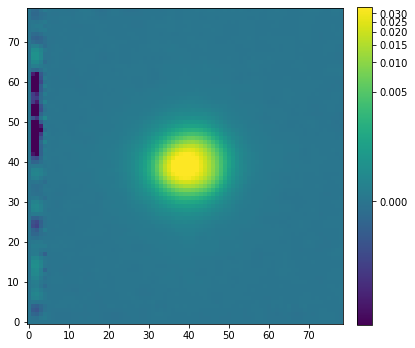

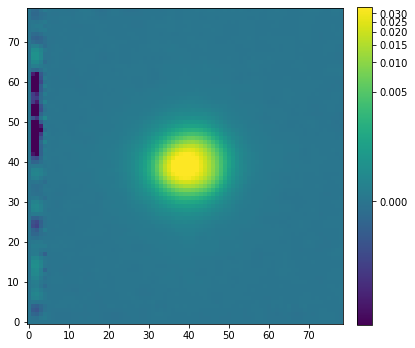

In [157]:
%run ~/github/Virgo/programs/build_web_coadds.py

In [133]:
h = build_html_pointing(p)

In [131]:
h.write_header()

ValueError: I/O operation on closed file.

In [121]:
p.get_params_for_gal_table()

In [ ]:
h.write_gal_table()

In [122]:
h.write_rband_div()

In [123]:
h.write_rband_table()

In [124]:
h.write_ha_div()

In [125]:
h.write_ha_table()

In [126]:
h.write_footer()

In [127]:
h.close_html()

In [130]:
p.r.imheader['TELESCOPE']

KeyError: "Keyword 'TELESCOPE' not found."

In [38]:
def display_image(image,percent=99.5,lowrange=False,mask=None,sigclip=False):
    lowrange=False
    # use inner 80% of image
    xdim,ydim = image.shape
    xmin = int(.2*xdim)
    xmax = int(.8*xdim)    
    ymin = int(.2*ydim)
    ymax = int(.8*ydim)    
    if sigclip:
        clipped_data = sigma_clip(image[xmin:xmax,ymin:ymax],sigma_lower=5,sigma_upper=5)#,grow=10)
    else:
        clipped_data = image[xmin:xmax,ymin:ymax]
    if lowrange:
        norm = simple_norm(clipped_data, stretch='linear',percent=percent)
    else:
        norm = simple_norm(clipped_data, stretch='asinh',percent=percent)

    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')
    

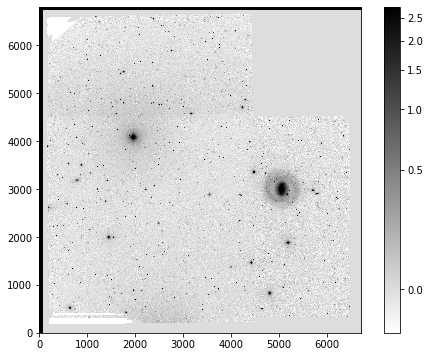

In [40]:
plt.figure(figsize=(8,6))
display_image(p.r.imdata,percent=99.5,sigclip=False,lowrange=False)
plt.colorbar()

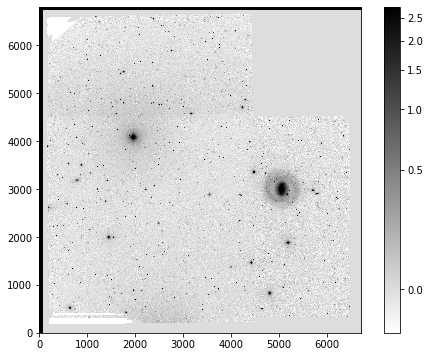

In [41]:
plt.figure(figsize=(8,6))
display_image(p.r.imdata,percent=99.5,sigclip=False,lowrange=True)
plt.colorbar()

In [41]:
plt.close('all')

# Cutouts

* creating png images

In [42]:
os.chdir('/home/rfinn/research/Virgo/html-dev/')

In [46]:
%run ~/github/Virgo/programs/build_web_cutouts.py

<Figure size 432x288 with 0 Axes>

/home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0481-NGC6307/VFID0481-NGC6307*-R.fits
['/home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0481-NGC6307/VFID0481-NGC6307-v19p010-R.fits']


/home/rfinn/github/Virgo/programs/build_web_cutouts.py:428: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))
/home/rfinn/github/Virgo/programs/build_web_cutouts.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))
/home/rfinn/github/Virgo/programs/build_web_cutouts.py:477: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, s

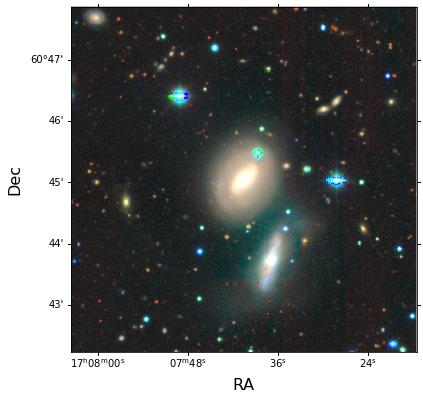

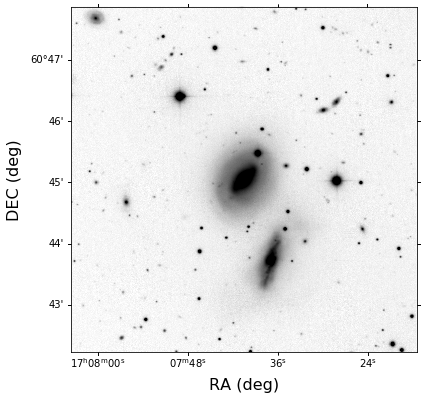

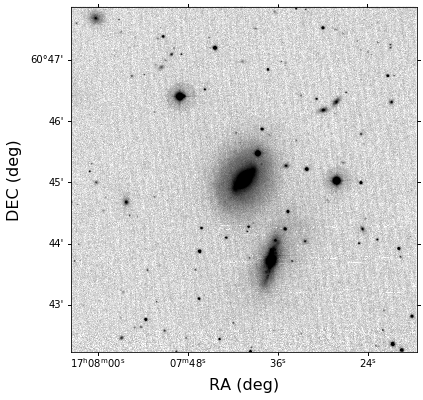

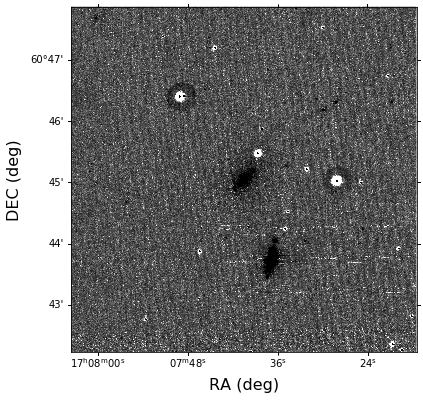

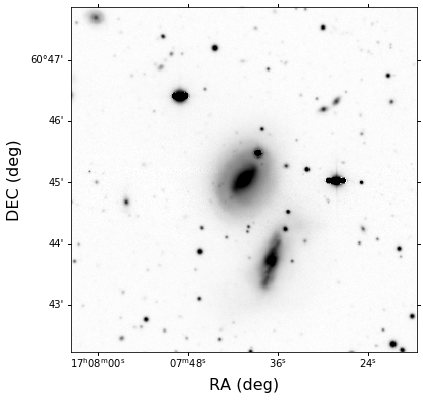

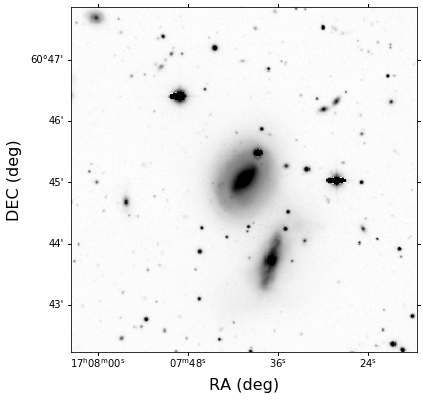

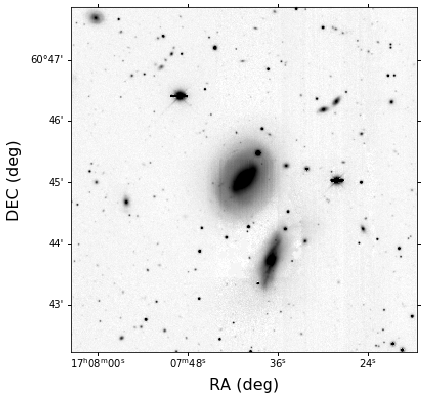

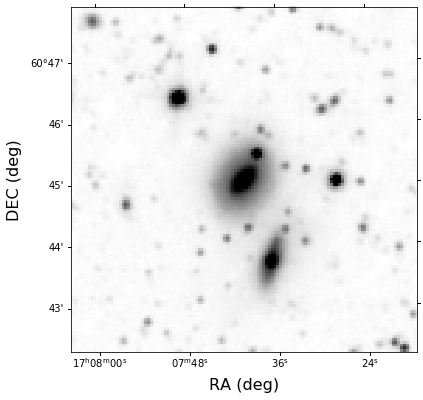

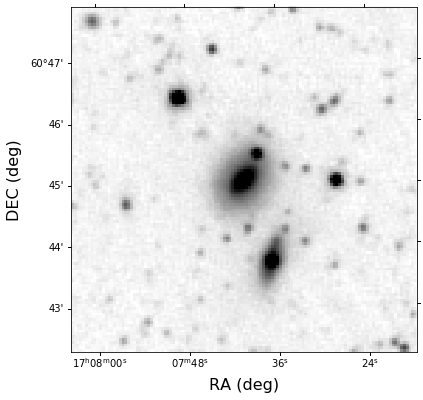

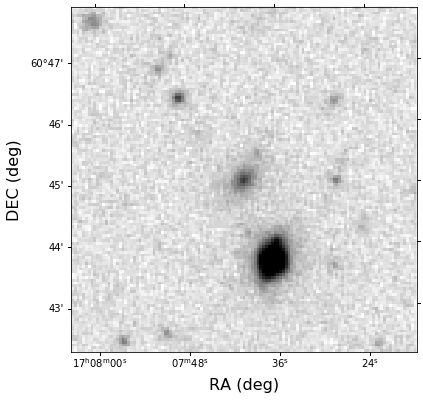

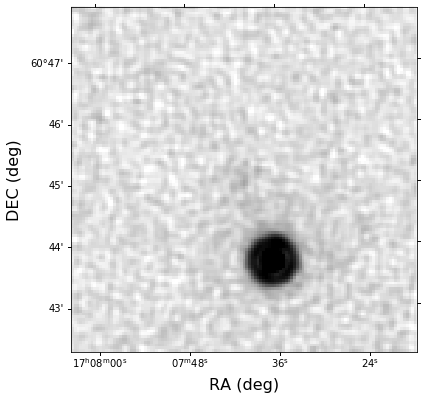

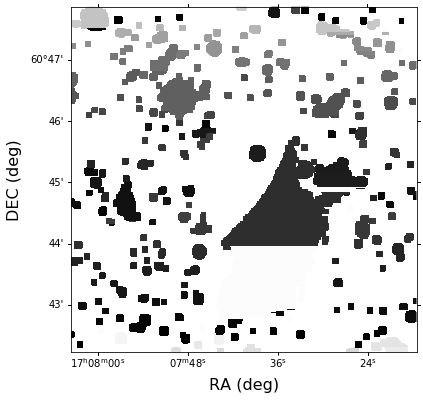

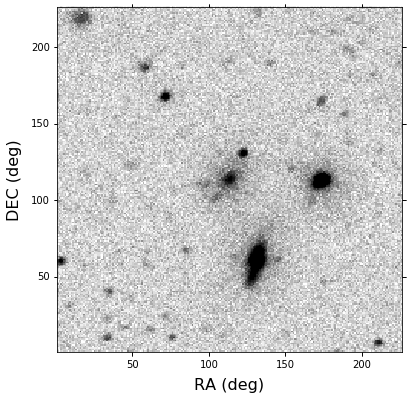

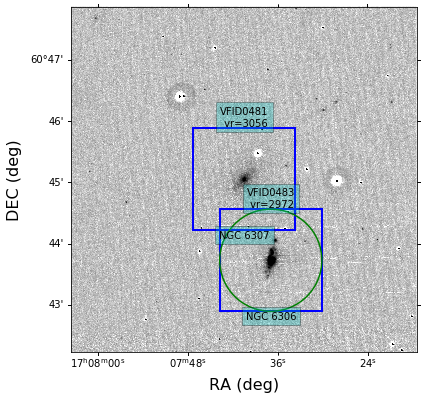

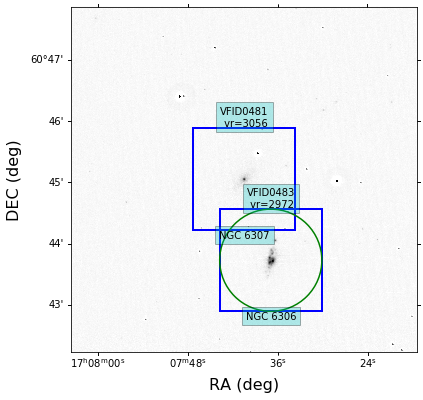

<Figure size 1008x432 with 0 Axes>

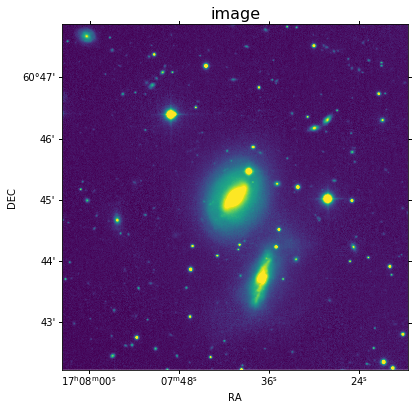

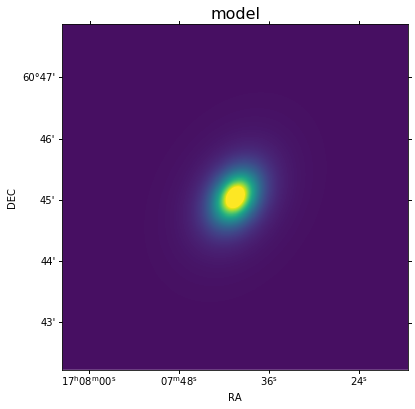

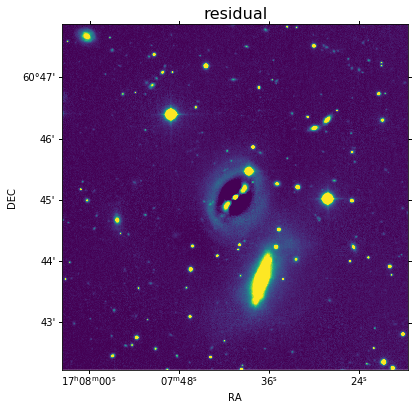

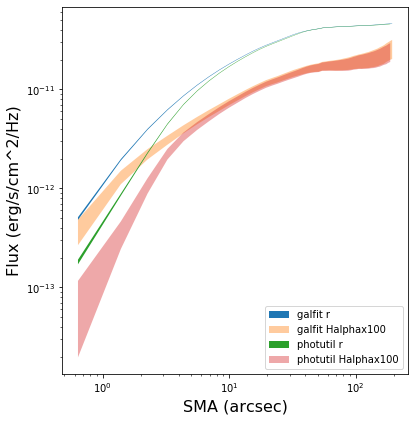

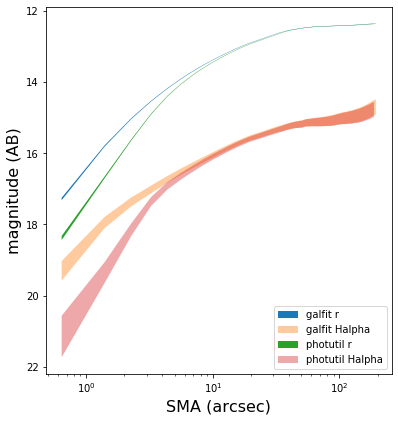

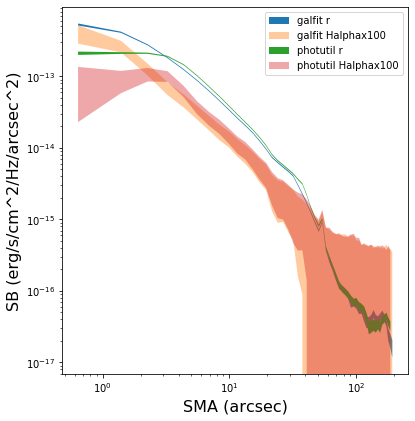

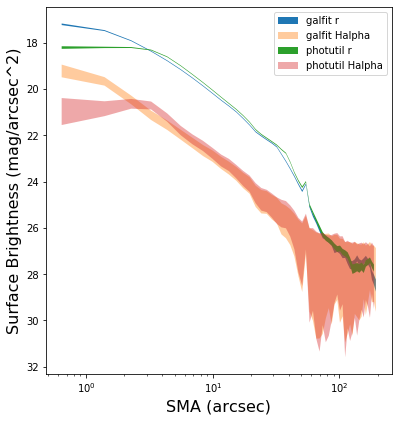

In [47]:
p.runall()

In [48]:
h = build_html_cutout(p,outdir)

['511.0+/-0.0', '509.4+/-0.0', '12.41+/-0.00', '38.77+/-0.11', '2.38+/-0.01', '0.72+/-0.00', '-31.9+/-0.3', '-0.00+/-0.00', '0', '0.38']


/home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0481-NGC6307/VFID0481-NGC6307*-R.fits
['/home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0481-NGC6307/VFID0481-NGC6307-v19p010-R.fits']


<Figure size 432x288 with 0 Axes>

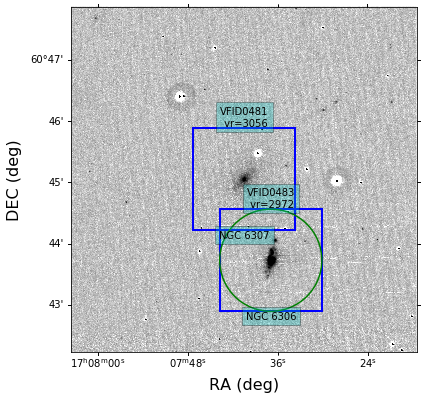

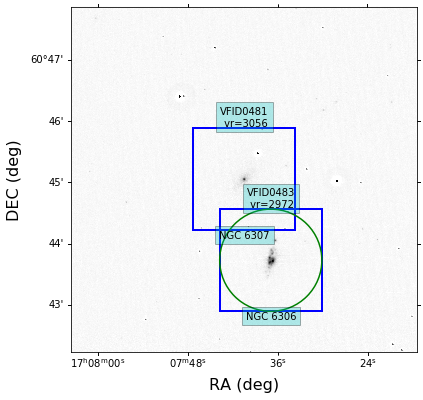

In [26]:
%run ~/github/Virgo/programs/build_web_cutouts.py
p.get_halpha_names()
p.make_cs_png()

In [413]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : scalars
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Returns
    -------
    text : `.Text`
        The created `.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : 

In [253]:
def display_image(image,percent=99.5,lowrange=False,mask=None,sigclip=True):
    lowrange=False
    # use inner 80% of image
    xdim,ydim = image.shape
    xmin = int(.1*xdim)
    xmax = int(.9*xdim)    
    ymin = int(.1*ydim)
    ymax = int(.9*ydim)
    if mask is not None:
        mask = mask[xmin:xmax,ymin:ymax]
    
    if sigclip:
        clipped_data = sigma_clip(image[xmin:xmax,ymin:ymax],sigma_lower=1.5,sigma_upper=1.5)#,grow=3)
    else:
        clipped_data = image[xmin:xmax,ymin:ymax]
    if mask is not None:
            clipped_data = np.ma.array(clipped_data,mask=mask)
    if lowrange:
        norm = simple_norm(clipped_data, stretch='linear',percent=percent)
    else:
        norm = simple_norm(clipped_data, stretch='asinh',percent=percent)


    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')
 

# Working on stacking wise images

* updated plot_cutouts_ha.py to cycle through each band and combine images from each band
* I think I wrote the stacking with Kim's project in mind, and she is only pulling images for one band.  The way I use it in get_unwise_images, I set bands='1234' to get all images.  This means I have to cycle through each band to stack image and noise:

```
        for b in bands:
            print('running swarp to combine multiple unwise images in band ',b)
            #########################################
            ## COMBINE THE IMAGE FRAMES USING AVERAGE
            #########################################        
            # create default.swarp
            os.system('swarp -d > default.swarp')
            # run swarp
            matchstring = "*w{}-img-m.fits".format(b)            
            if subfolder is not None:
                allfiles = glob.glob(subfolder+'/'+galid+matchstring)
            else:
                allfiles = glob.glob(galid+matchstring)

            all_images = " ".join(allfiles)
            output_image = str(galid)+'-'
            s = 'swarp '+all_images+' -COMBINE_TYPE AVERAGE -WEIGHT_SUFFIX .std.fits -SUBTRACT_BACK N'
            print(s)
            os.system(s)



```

* testing on one image that has multiple wise images

In [49]:
os.chdir('/home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0611-NGC5985/')

In [69]:
!rm unwise/*coadd*.fits

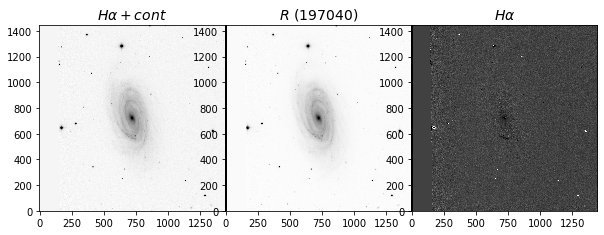

In [50]:
%run ~/github/HalphaImaging/python3/plot_cutouts_ha.py --r VFID0611-NGC5985-v19p040-R.fits

trying to download legacy image
requested legacy imsize =  479.5641840901035
legacy imsize =  479
previously downloaded  legacy/VFID0611-legacy-479.jpg
previously downloaded  legacy/VFID0611-legacy-479-g.fits
legacy imsize =  479
previously downloaded  legacy/VFID0611-legacy-479.jpg
previously downloaded  legacy/VFID0611-legacy-479-r.fits
legacy imsize =  479
previously downloaded  legacy/VFID0611-legacy-479.jpg
previously downloaded  legacy/VFID0611-legacy-479-z.fits
wise image size =  174.3869760327649
unwise images already downloaded
['unwise/VFID0611-unwise-2361p590-w4-img-m.fits', 'unwise/VFID0611-unwise-2332p590-w1-img-m.fits', 'unwise/VFID0611-unwise-2361p590-w2-img-m.fits', 'unwise/VFID0611-unwise-2332p590-w4-img-m.fits', 'unwise/VFID0611-unwise-2361p590-w3-img-m.fits', 'unwise/VFID0611-unwise-2332p590-w3-img-m.fits', 'unwise/VFID0611-unwise-2361p590-w1-img-m.fits', 'unwise/VFID0611-unwise-2332p590-w2-img-m.fits']
going to try new stacking for wise multiframe
running swarp to c

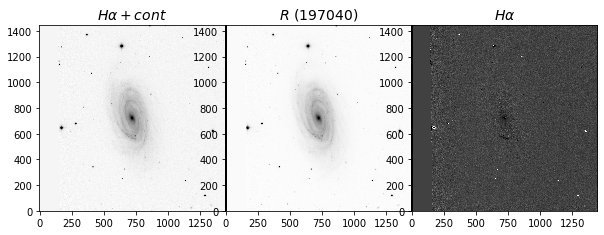

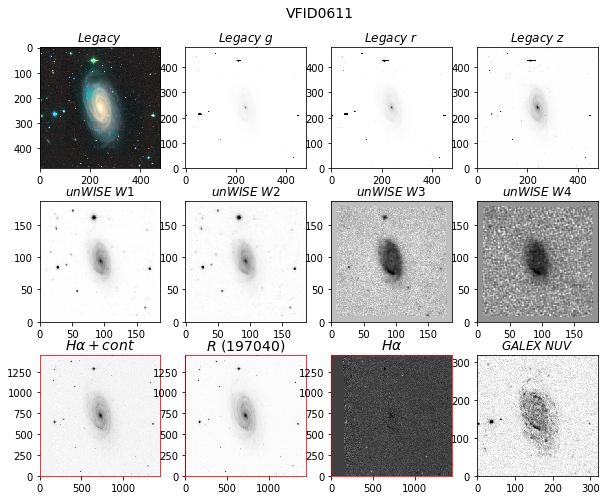

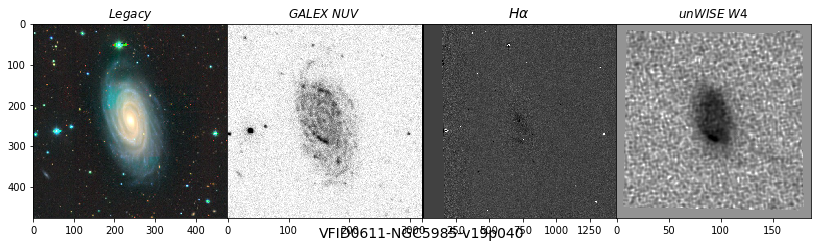

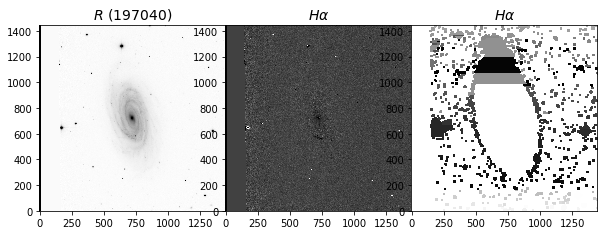

<Figure size 432x288 with 0 Axes>

In [70]:
%run ~/github/HalphaImaging/python3/plot_cutouts_ha.py --r VFID0611-NGC5985-v19p040-R.fits --plotall

# Yay!  unWISE coaddition is working!!!

* but does it work if the images already exist?

* well, after a little fix, it does now...

trying to download legacy image
requested legacy imsize =  479.5641840901035
legacy imsize =  479
previously downloaded  legacy/VFID0611-legacy-479.jpg
previously downloaded  legacy/VFID0611-legacy-479-g.fits
legacy imsize =  479
previously downloaded  legacy/VFID0611-legacy-479.jpg
previously downloaded  legacy/VFID0611-legacy-479-r.fits
legacy imsize =  479
previously downloaded  legacy/VFID0611-legacy-479.jpg
previously downloaded  legacy/VFID0611-legacy-479-z.fits
wise image size =  174.3869760327649
found unwise coadds
current directory =  /home/rfinn/research/Virgo/gui-output-2019-june/cutouts/VFID0611-NGC5985
['VFID0611-unwise-w4-coadd.fits', 'VFID0611-unwise-w1-coadd.fits', 'VFID0611-unwise-w3-coadd.fits', 'VFID0611-unwise-w2-coadd.fits']
wise filename : unwise/VFID0611-unwise-w4-coadd.fits
wise filename : unwise/VFID0611-unwise-w1-coadd.fits
wise filename : unwise/VFID0611-unwise-w3-coadd.fits
wise filename : unwise/VFID0611-unwise-w2-coadd.fits


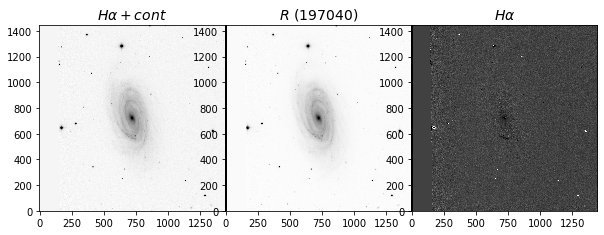

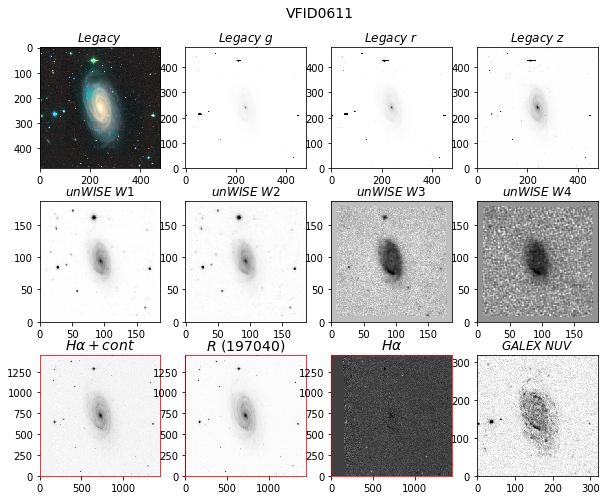

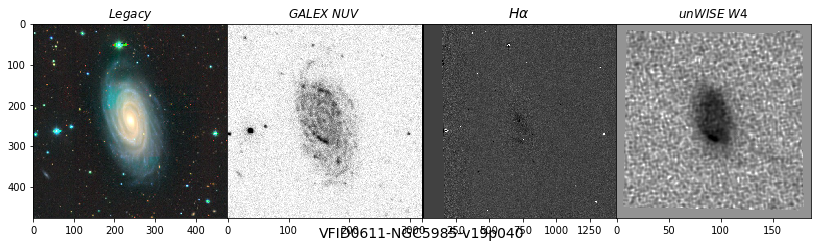

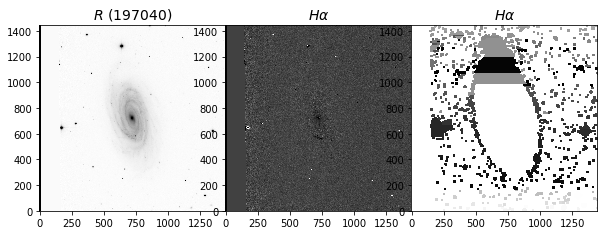

<Figure size 432x288 with 0 Axes>

In [72]:
%run ~/github/HalphaImaging/python3/plot_cutouts_ha.py --r VFID0611-NGC5985-v19p040-R.fits --plotall

# 2023-May

* Updating code to build webpages for coadds
* adding the CS image
* adding the plot from the filter ratio
* creating a csv file with galaxies in FOV
  * this will provide an estimate of halpha observed sample, independent of gui
  


In [25]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits

In [5]:
# directory with all the coadds
os.chdir('/media/rfinn/hdata/coadds/all-virgo-coadds/')

In [8]:
# checking to see if the r and halpha targets will match if I sort them 

a = glob.glob('VF*INT*-r-shifted.fits')
b = glob.glob('VF*HDI*-r.fits')
c = glob.glob('VF*HDI*-R.fits')
d = glob.glob('VF*BOK*-r.fits')         
rfiles = a + b + c + d

#halpha_names = ['ha4','Halpha','Ha6657','Ha4']        
a = glob.glob('VF*INT*-Halpha.fits')
b = glob.glob('VF*HDI*-Ha4.fits')
c = glob.glob('VF*HDI*-ha4.fits')
d = glob.glob('VF*BOK*-Ha6657.fits')         
hfiles = a + b + c + d

# sort files
rfiles.sort()
hfiles.sort()

In [11]:
for r,h in zip(rfiles,hfiles):
    tr = r.split('-')
    th = h.split('-')
    rpointing = tr[4]
    hpointing = th[4]
    #print(rpointing,hpointing)
    print(r,h)

VF-118.182+20.982-INT-20190205-p001-r-shifted.fits VF-118.182+20.982-INT-20190205-p001-Halpha.fits
VF-122.386+22.680-INT-20190207-lmp001-r-shifted.fits VF-122.386+22.680-INT-20190207-lmp001-Halpha.fits
VF-124.262+21.175-INT-20190211-lmp004-r-shifted.fits VF-124.262+21.175-INT-20190211-lmp004-Halpha.fits
VF-124.359+24.368-INT-20190205-p002-r-shifted.fits VF-124.359+24.368-INT-20190205-p002-Halpha.fits
VF-124.523+22.625-INT-20190208-lmp005-r-shifted.fits VF-124.523+22.625-INT-20190208-lmp005-Halpha.fits
VF-124.537+24.716-INT-20190207-lmp002-r-shifted.fits VF-124.537+24.716-INT-20190207-lmp002-Halpha.fits
VF-125.713+22.678-INT-20190205-p004-r-shifted.fits VF-125.713+22.678-INT-20190205-p004-Halpha.fits
VF-125.730+22.025-INT-20190208-lmp009-r-shifted.fits VF-125.730+22.025-INT-20190208-lmp009-Halpha.fits
VF-126.297+27.994-HDI-20180313-p004-R.fits VF-126.297+27.994-HDI-20180314-p004-ha4.fits
VF-126.652+28.234-BOK-20210417-VFID3106-r.fits VF-126.689+25.476-INT-20190208-lmp010-Halpha.fits
VF-

In [13]:
!ls VF-126.652+28.234-BOK-20210417-VFID3106*

VF-126.652+28.234-BOK-20210417-VFID3106-Ha4.cat
VF-126.652+28.234-BOK-20210417-VFID3106-Ha4-CS.fits
VF-126.652+28.234-BOK-20210417-VFID3106-Ha4.fits
VF-126.652+28.234-BOK-20210417-VFID3106-Ha4.weight.fits
VF-126.652+28.234-BOK-20210417-VFID3106_pan_tab.csv
VF-126.652+28.234-BOK-20210417-VFID3106-r.cat
VF-126.652+28.234-BOK-20210417-VFID3106-r.fits
VF-126.652+28.234-BOK-20210417-VFID3106-r.weight.fits


In [16]:
os.getcwd()

'/media/rfinn/hdata/coadds/all-virgo-coadds'

In [17]:
fname = os.path.join(os.getcwd(),'VF-126.652+28.234-BOK-20210417-VFID3106-r.fits')

In [21]:
os.path.dirname(fname)

'/media/rfinn/hdata/coadds/all-virgo-coadds'

## Display continue subtracted images

In [33]:
from astropy.visualization import simple_norm

In [36]:
fname = os.path.join(os.getcwd(),'VF-118.182+20.982-INT-20190205-p001-Halpha-CS.fits')
t = fits.getdata(fname)

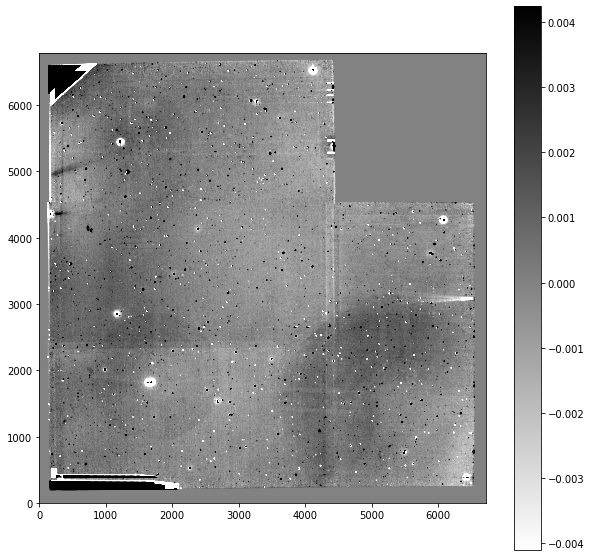

In [43]:
plt.figure(figsize=(10,10))
norm = simple_norm(t,stretch='linear',min_percent=10,max_percent=90)
plt.imshow(t,norm=norm,cmap='gray_r',origin='lower')
plt.colorbar()

In [57]:
# size of cutout boxes

np.floor(13/4)+1


4.0

## colate the galsFOV.csv files and cross match with vf-v2 catalogs

In [58]:
os.chdir('/home/rfinn/research/Virgo-dev/html-dev/coadds/')
t = os.listdir()

In [60]:
csvfiles = []
for d in t:
    csvfiles.append(os.path.join(d,d+'-galsFOV.csv'))

In [61]:
csvfiles

['VF-210.007+38.349-HDI-20170523-p010-/VF-210.007+38.349-HDI-20170523-p010--galsFOV.csv',
 'VF-145.608+31.863-INT-20190206-p035/VF-145.608+31.863-INT-20190206-p035-galsFOV.csv',
 'VF-158.806+37.499-INT-20190210-p059/VF-158.806+37.499-INT-20190210-p059-galsFOV.csv',
 'VF-217.932+03.180-INT-20190210-p140/VF-217.932+03.180-INT-20190210-p140-galsFOV.csv',
 'VF-200.604+28.471-HDI-20170520-p004-/VF-200.604+28.471-HDI-20170520-p004--galsFOV.csv',
 'VF-174.812+31.908-INT-20190211-p088/VF-174.812+31.908-INT-20190211-p088-galsFOV.csv',
 'VF-157.087+29.490-INT-20190212-p056/VF-157.087+29.490-INT-20190212-p056-galsFOV.csv',
 'VF-162.760+32.934-INT-20190205-p065/VF-162.760+32.934-INT-20190205-p065-galsFOV.csv',
 'VF-130.869+49.783-INT-20190206-p013/VF-130.869+49.783-INT-20190206-p013-galsFOV.csv',
 'VF-125.713+22.678-INT-20190205-p004/VF-125.713+22.678-INT-20190205-p004-galsFOV.csv',
 'VF-215.038+03.955-INT-20190208-p131/VF-215.038+03.955-INT-20190208-p131-galsFOV.csv',
 'VF-161.262+34.959-INT-2019

In [62]:
b = open(csvfiles[0],'r')

In [63]:
l = b.readlines()

In [64]:
l

['VFID2245, VF-210.007+38.349-HDI-20170523-p010- \n',
 'VFID2259, VF-210.007+38.349-HDI-20170523-p010- \n',
 'VFID2260, VF-210.007+38.349-HDI-20170523-p010- \n']

In [66]:
%run ~/github/Virgo/programs/gather_gals_FOV.py

In [67]:
vfid

['VFID2245',
 'VFID2259',
 'VFID2260',
 'VFID2758',
 'VFID2759',
 'VFID2761',
 'VFID2772',
 'VFID2773',
 'VFID2789',
 'VFID2301',
 'VFID2313',
 'VFID6094',
 'VFID6104',
 'VFID6108',
 'VFID6118',
 'VFID6122',
 'VFID6157',
 'VFID6175',
 'VFID3015',
 'VFID3062',
 'VFID2760',
 'VFID2764',
 'VFID2948',
 'VFID2665',
 'VFID2667',
 'VFID2670',
 'VFID2677',
 'VFID2690',
 'VFID2691',
 'VFID2701',
 'VFID1363',
 'VFID3474',
 'VFID3481',
 'VFID3485',
 'VFID3489',
 'VFID3490',
 'VFID3493',
 'VFID3500',
 'VFID6000',
 'VFID6018',
 'VFID6020',
 'VFID6033',
 'VFID2519',
 'VFID5383',
 'VFID5392',
 'VFID5397',
 'VFID5524',
 'VFID5547',
 'VFID3516',
 'VFID3532',
 'VFID6603',
 'VFID6614',
 'VFID6634',
 'VFID2135',
 'VFID2140',
 'VFID2144',
 'VFID2153',
 'VFID2154',
 'VFID2156',
 'VFID2165',
 'VFID2176',
 'VFID5608',
 'VFID5614',
 'VFID2997',
 'VFID3003',
 'VFID3033',
 'VFID3036',
 'VFID3040',
 'VFID5897',
 'VFID5917',
 'VFID5931',
 'VFID5943',
 'VFID5949',
 'VFID5960',
 'VFID5972',
 'VFID3200',
 'VFID2758',

In [68]:
len(vfid)

614

In [71]:
len(vfid) - len(set(vfid))

69

In [72]:
uniqueid = set(vfid)

In [78]:
for i in uniqueid:
    ncount = vfid.count(i)
    if ncount > 1:
        print(i,ncount)

VFID3103 2
VFID3315 2
VFID1595 2
VFID2153 2
VFID1726 2
VFID5868 2
VFID3369 2
VFID2301 2
VFID5892 2
VFID2083 2
VFID2773 2
VFID3287 2
VFID5842 2
VFID2057 2
VFID2548 2
VFID2135 2
VFID3093 2
VFID2491 2
VFID2544 2
VFID5851 2
VFID2497 2
VFID2011 2
VFID2066 2
VFID5859 2
VFID2313 2
VFID1593 2
VFID2551 2
VFID2365 2
VFID3296 2
VFID2140 2
VFID2758 2
VFID2550 2
VFID2761 2
VFID5879 2
VFID2772 2
VFID2144 2
VFID1588 2
VFID2619 3
VFID2074 2
VFID3076 2
VFID2156 2
VFID2635 2
VFID2648 2
VFID2641 2
VFID1587 2
VFID2073 2
VFID1605 2
VFID5889 2
VFID2068 2
VFID3098 2
VFID2086 2
VFID1589 2
VFID2346 2
VFID3363 2
VFID2558 2
VFID3084 2
VFID2049 2
VFID3362 2
VFID3261 2
VFID2462 2
VFID5844 2
VFID2095 2
VFID3276 2
VFID2070 2
VFID2055 2
VFID2759 2
VFID1604 2
VFID2076 2


In [74]:
seen = set()
dupes = []

for x in vfid:
    if x in seen:
        dupes.append(x)
    else:
        seen.add(x)

In [76]:
vfid.count(vfid[0])

1

In [95]:
%run ~/github/Virgo/programs/gather_gals_FOV.py

In [96]:
newtab[newtab['ncoadd']==2]

<Table length=67>
  VFID   HaObsFlag                  Coadd1                  ... Coadd3 ncoadd
 bytes8     bool                    str40                   ... str40  int32 
-------- --------- ---------------------------------------- ... ------ ------
VFID1587      True  VF-202.713+46.868-BOK-20210315-VFID1573 ...             2
VFID1588      True  VF-202.713+46.868-BOK-20210315-VFID1573 ...             2
VFID1589      True  VF-202.713+46.868-BOK-20210315-VFID1573 ...             2
VFID1593      True  VF-202.713+46.868-BOK-20210315-VFID1573 ...             2
VFID1595      True  VF-202.713+46.868-BOK-20210315-VFID1573 ...             2
VFID1604      True  VF-202.713+46.868-BOK-20210315-VFID1573 ...             2
VFID1605      True  VF-202.713+46.868-BOK-20210315-VFID1573 ...             2
VFID1726      True      VF-134.737+44.906-INT-20190205-p019 ...             2
VFID2011      True      VF-208.591+41.310-INT-20190211-p121 ...             2
VFID2049      True  VF-208.704+40.669-BOK-20210417-VFID2068 ...             2
     ...       ...                                      ... ...    ...    ...
VFID3363      True      VF-124.359+24.368-INT-20190205-p002 ...             2
VFID3369      True      VF-124.359+24.368-INT-20190205-p002 ...             2
VFID5842      True      VF-208.804+05.187-INT-20190206-p120 ...             2
VFID5844      True      VF-208.804+05.187-INT-20190206-p120 ...             2
VFID5851      True      VF-208.804+05.187-INT-20190206-p120 ...             2
VFID5859      True      VF-208.804+05.187-INT-20190206-p120 ...             2
VFID5868      True      VF-208.804+05.187-INT-20190206-p120 ...             2
VFID5879      True      VF-208.804+05.187-INT-20190206-p120 ...             2
VFID5889      True      VF-208.804+05.187-INT-20190206-p120 ...             2
VFID5892      True      VF-208.804+05.187-INT-20190206-p120 ...             2

In [97]:
%run ~/github/Virgo/programs/readtablesv2.py

/home/rfinn/github/Virgo/programs/readtablesv2.py:144: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:144: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:145: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:145: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:146: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:146: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:148: RuntimeWarning: invalid value encountered in log10
  const =

In [98]:
v.haobs.colnames

['VFID', 'HaObsFlag', 'Coadd1', 'Coadd2', 'Coadd3', 'ncoadd']

In [99]:
np.sum(v.haobs['HaObsFlag'])

545

In [103]:
np.sum(v.main['HAobsflag'])

665

# Working on displaying galfit model

the stretch craps out for some galaxies :(

In [32]:
import os
import numpy as np
import glob
from scipy.stats import scoreatpercentile
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from astropy.visualization import SqrtStretch, PercentileInterval
from astropy.visualization import ImageNormalize
from astropy.visualization import LinearStretch,SinhStretch
from astropy import units as u
from astropy.nddata import Cutout2D
from astropy.stats import sigma_clip

from PIL import Image



%matplotlib inline


In [19]:
import sys
sys.path.append('/home/rfinn/github/Virgo/programs/')


In [22]:
%load_ext autoreload
%autoreload 2
import build_web_cutouts2 as bwc


In [3]:
os.chdir('/home/rfinn/research/Virgo-dev/image-display-dev/VFID0501-UGC09556-BOK-20210315-VFID0501')

In [11]:
infile = 'VFID0501-UGC09556-BOK-20210315-VFID0501-R-1Comp-galfit-out.fits'
im = fits.open(infile)
mask = fits.open('VFID0501-UGC09556-BOK-20210315-VFID0501-R-mask.fits')

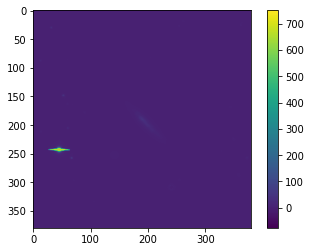

In [16]:
plt.figure()
plt.imshow(im[1].data)
plt.colorbar()

In [55]:
def display_galfit_model(galfile,percentile1=.5,percentile2=99.5,p1residual=5,p2residual=99,cmap='viridis',zoom=None,outdir=None,mask=None):
      '''
      ARGS:
      galfile = galfit output image (with image, model, residual)
      percentile1 = min percentile for stretch of image and model
      percentile2 = max percentile for stretch of image and model
      p1residual = min percentile for stretch of residual
      p2residual = max percentile for stretch of residual
      cmap = colormap, default is viridis
      '''
      # model name


      image,h = fits.getdata(galfile,1,header=True)
      model = fits.getdata(galfile,2)
      residual = fits.getdata(galfile,3)

      if zoom is not None:
         print("who's zoomin' who?")
         # display central region of image

         # get image dimensions and center
         xmax,ymax = image.shape
         xcenter = int(xmax/2)
         ycenter = int(ymax/2)

         # calculate new size to display based on zoom factor
         new_xradius = int(xmax/2/(float(zoom)))
         new_yradius = int(ymax/2/(float(zoom)))

         # calculate pixels to keep based on zoom factor
         x1 = xcenter - new_xradius
         x2 = xcenter + new_xradius
         y1 = ycenter - new_yradius
         y2 = ycenter + new_yradius
         
         # check to make sure limits are not outsize image dimensions
         if (x1 < 1):
            x1 = 1
         if (y1 < 1):
            y1 = 1
         if (x2 > xmax):
            x2 = xmax
         if (y2 > ymax):
            y2 = ymax

         # cut images to new size
         image = image[x1:x2,y1:y2]
         model = model[x1:x2,y1:y2]
         residual = residual[x1:x2,y1:y2]         
         pass
      imwcs = wcs.WCS(h)
      images = [image,model,residual]
      titles = ['image','model','residual']
      if mask is not None:
          im = image[~mask]
          res = residual[~mask]
          v1 = [scoreatpercentile(im,percentile1),
                scoreatpercentile(im,percentile1),
                scoreatpercentile(res,p1residual)]
          v2 = [scoreatpercentile(im,percentile2),
                scoreatpercentile(im,percentile2),
                scoreatpercentile(res,p2residual)]
          norms = [simple_norm(im,'asinh',max_percent=percentile2),
                   simple_norm(im,'asinh',max_percent=percentile2),
                   simple_norm(res,'asinh',max_percent=percentile2,min_percent=20)]

      else:
          v1 = [scoreatpercentile(image,percentile1),
                scoreatpercentile(image,percentile1),
                scoreatpercentile(residual,p1residual)]
          v2 = [scoreatpercentile(image,percentile2),
                scoreatpercentile(image,percentile2),
                scoreatpercentile(residual,p2residual)]
          norms = [simple_norm(image,'asinh',max_percent=percentile2),
                   simple_norm(image,'asinh',max_percent=percentile2),
                   simple_norm(residual,'asinh',max_percent=percentile2)]

      outim = ['galfit_image.png','galfit_model.png','galfit_residual.png']
      if outdir is not None:
          outim = [os.path.join(outdir,f) for f in outim]
      for i,im in enumerate(images):
          fig = plt.figure(figsize=(6,6))          
          plt.subplot(1,1,1,projection=imwcs)
          plt.subplots_adjust(top=.95,right=.95,left=.2,bottom=.15)
          plt.imshow(im,origin='lower',cmap=cmap,norm=norms[i])
          #plt.colorbar(fraction=.08)
          plt.xlabel('RA (deg)',fontsize=16)
          plt.ylabel('DEC (deg)',fontsize=16)
          #plt.title(titles[i],fontsize=16)
          plt.savefig(outim[i])
          #plt.close(fig)

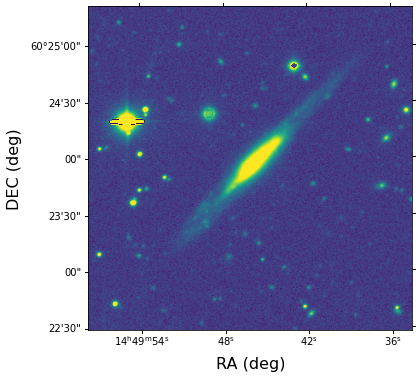

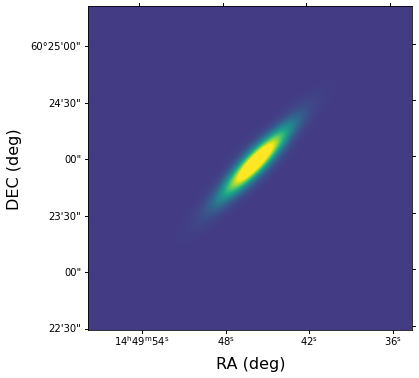

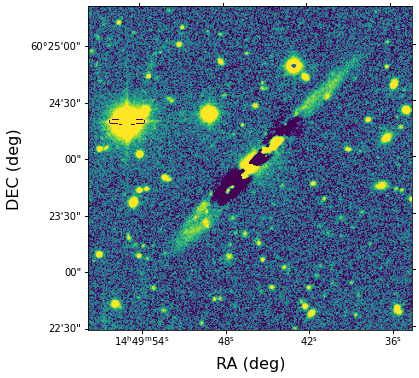

In [56]:
maskdat = mask[0].data > 0
display_galfit_model(infile,mask=maskdat)
plt.show()

In [60]:
def display_image(image,percentile1=.5,percentile2=99.5,stretch='asinh',mask=None,sigclip=True):
    lowrange=False
    # use inner 80% of image
    xdim,ydim = image.shape
    xmin = int(.1*xdim)
    xmax = int(.9*xdim)    
    ymin = int(.1*ydim)
    ymax = int(.9*ydim)
    if mask is not None:
        imdata = np.ma.array(image,mask=mask)
        
    else:
        imdata = image
    v1 = scoreatpercentile(imdata,percentile1)    
    v2 = scoreatpercentile(imdata,percentile2)
    
    if mask is not None:
        statim = image[~mask]
    else:
        statim = image

    if sigclip:
        if mask is not None:
            clipped_data = sigma_clip(image[xmin:xmax,ymin:ymax][~mask[xmin:xmax,ymin:ymax]],sigma_lower=1.5,sigma_upper=1.5,grow=10,stdfunc='mad_std')
        else:
            clipped_data = sigma_clip(image[xmin:xmax,ymin:ymax],sigma_lower=1.5,sigma_upper=1.5,grow=10,stdfunc='mad_std')            
    else:
        clipped_data = image[xmin:xmax,ymin:ymax]

    norm = simple_norm(clipped_data, stretch=stretch,max_percent=percentile2,min_percent=percentile1)

    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')#,vmin=v1,vmax=v2)
    


In [58]:
cs = fits.open('VFID0501-UGC09556-BOK-20210315-VFID0501-CS.fits')

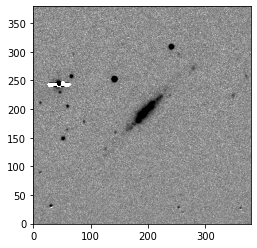

In [68]:
maskdat = mask[0].data > 0
display_image(cs[0].data,stretch='asinh',percentile1=.15,percentile2=99.5,mask=maskdat)

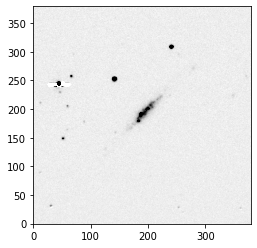

In [70]:
maskdat = mask[0].data > 0
display_image(cs[0].data,stretch='linear',percentile1=.15,percentile2=99.9,mask=maskdat)

In [73]:
test = 'abc'
if 'c' in test: print('yay!')

yay!
